## 1.Importing the Dataset
for this section, we are going to divide it into two;

importing required libraries
importing the dataset

1.1 Importing required libraries
Focus on importing all the required libraries. Some of which will help us when importing the data.

In [1]:
# import libraries to be used in data wrangling and data manipulation
import numpy as np
import pandas as pd

#import libraries important during the EDA process
import matplotlib.pyplot as plt
import seaborn as sns
import string

#import libraries for feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# import models to be used for the modelling process
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#import libraries for model evaluation
from sklearn.metrics import classification_report

In [2]:
# import the train dataset
train = pd.read_csv('train_set.csv')

# import the test set
test = pd.read_csv('test_set.csv')

In [3]:
# take a look at the dataset
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


Text(0.5, 1.0, 'distribution of languages')

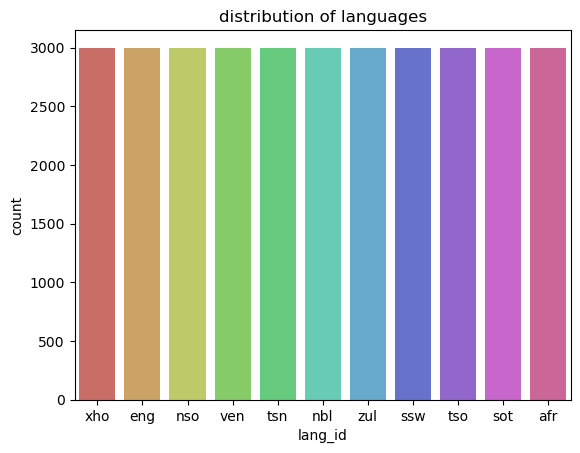

In [4]:
#check for the variable distribution off the dataset
sns.countplot(x = 'lang_id', data = train, palette = 'hls')
plt.title("distribution of languages")

The data is evenly distributed hence it does not need to be resample since there is no class imbalance

In [5]:
#check for punctuations in the data
#train.loc[train['text'].str.contains(string.punctuation)]

In [6]:
# remove available punctuation marks
def punc_remover(text):
    return ''.join(text.replace('-', '').replace('.', ''))

In [7]:
train['text'] = train['text'].apply(punc_remover)

In [8]:
#remove available punctuations from the test data
test['text'] = test['text'].apply(punc_remover)

In [9]:
#declare the label to start encoding

y_train = train['lang_id']

In [10]:
#encode the label
#encoder = LabelEncoder()
#y_train = pd.DataFrame(data = encoder.fit_transform(y_train))
#print(y_train)


In [11]:
#generate features for the model using tf-idf
vect = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_df= 0.75, min_df=2)
X_train = vect.fit_transform(train['text'])
X_test = vect.transform(test['text'])

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 40)

In [ ]:
#create models for the dataset

#create a function that takes a model, data and returns a trained model

def trainer(model, X_train, y_train):
    
    trained_model = model.fit(X_train, np.ravel(y_train))

    return trained_model

#start instantiating models

#train a random forest classifier model
rfc = trainer(RandomForestClassifier(random_state=40), X_train, y_train)

#train a naive bayes model
# a multinomial model was used due to the discrete nature of the features
nb = trainer(MultinomialNB(), X_train, y_train)

#train a support vector classifier model
svc = trainer(SVC(), X_train, y_train)

#make predictions of the validation set with the models
rfc_preds = rfc.predict(X_val)
nb_preds = nb.predict(X_val)
svc_preds = svc.predict(X_val)


In [ ]:
#evaluate the models to check the perfomance

#print out a classification report for the random forest classifier
print("rfc report\n", classification_report(y_val, rfc_preds))

In [ ]:
#evaluate the models to check the perfomance

#print out a classification report for the naive bayes model
print("nb report\n", classification_report(y_val, nb_preds))

In [ ]:
#print out the classification report for the svc model
print('svc report\n', classification_report(y_val, svc_preds))

In [ ]:
#generate a submission file for the kaggle competition

#start by creating a dictionary that matches
y_test = nb.predict(X_test)
submission = pd.DataFrame({'index':np.arange(1,len(y_test)+1,1), 'lang_id':y_test})
submission.to_csv('submission.csv', index=False)
